In [24]:
import sys
sys.path.append("../")
from qca import main_from_params_list, QCA
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [15]:
# Set up three simulations. 

# System size. Adjust to introduce memory bug
L = 6    # No apparent memory bug for small systems
# L = 20 # Large enough system size means memory dips into swap introducing a bug. May take a couple days to finish

# Each has a different initial condition:
# All spins parallel with a polar angle of 40, 45, or 50 degrees
ths = [40.0, 45.0, 50.0]
ICs = [f"ot{th}" for th in ths]


params_template = dict(
              T=100,
              L=L,
              dt=1.0,
              r=1,
              V="A", # Haar random unitary
              N=100, # 100 trials (RNG realizations)
              BC="0",
              E=0.0,
              totalistic=False,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

params_list = []
for ICi, IC in enumerate(ICs):
    params = deepcopy(params_template)
    params["IC"] = IC
    params_list.append(params)

In [16]:
# Simulations differing only in core count will have the same name so we put them in different directories
der1 = r"/home/lhillber/documents/research/cellular_automata/qca/data/temp/use_swap/"
der2 = r"/home/lhillber/documents/research/cellular_automata/qca/data/temp/dont_use_swap/"
ders = [der1, der2]

nprocs_list = [3, 1] # Parralelization of different initial conditions
nprocs_for_trials_list = [10, 25] # Parallelization of trials for a given initial condition

# Run simulations
for der, nprocs, nprocs_for_trials in zip(ders, nprocs_list, nprocs_for_trials_list):
    params_list_copy = deepcopy(params_list)
    main_from_params_list(params_list_copy,
                          tasks=["rhoj", "rhojk", "sbipart_2", "rho3", "rho4", "rho5"], # Tasks to run; affects memory
                          der=der, 
                          nprocs=nprocs,
                          nprocs_for_trials=nprocs_for_trials,
                          recalc=False)

Running:
    {'L': 6, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'A', 'IC': 'ot40.0', 'BC': '0', 'E': 0.0, 'N': 100, 'trotter': True, 'symmetric': False, 'totalistic': False, 'hamiltonian': False}

10 January 2022, 10:28:25
Running 3 job(s) with 25 worker(s)
Updated: a9217496cb671934406ceda4a9c0c44e34138f25
    with ['rhoj', 'rhojk', 'sbipart_2', 'rho3', 'rho4', 'rho5']
Parameters: {'L': 6, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'A', 'IC': 'ot40.0', 'BC': '0', 'E': 0.0, 'N': 100, 'trotter': True, 'symmetric': False, 'totalistic': False, 'hamiltonian': False}
Available data: ['params', 'rho3', 'rho4', 'rho5', 'rhoj', 'rhojk', 'sbipart_2']
Total file size: 2.61 MB
Took: 4.46 s
Data at:
/home/lhillber/documents/research/cellular_automata/qca/data/temp/dont_use_swap/a9217496cb671934406ceda4a9c0c44e34138f25.hdf5

Running:
    {'L': 6, 'T': 100.0, 'dt': 1.0, 'R': 6, 'r': 1, 'V': 'A', 'IC': 'ot45.0', 'BC': '0', 'E': 0.0, 'N': 100, 'trotter': True, 'symmetric': False, 'totalistic': False

In [32]:
# Load simulations
Qs = np.zeros((len(ders), len(ICs)), dtype="object")
for deri, der in enumerate(ders):
    for ICi, IC in enumerate(ICs):
        params = deepcopy(params_template)
        params["IC"] = IC
        Qs[deri, ICi] = QCA(params, der=der)

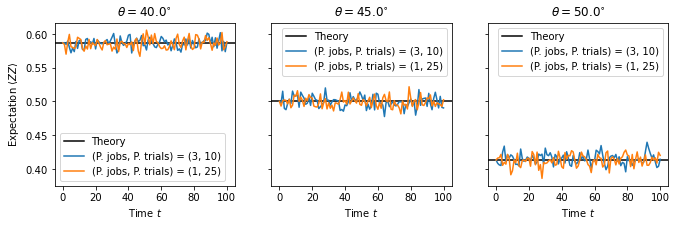

In [55]:
# Plot results
fig, axs = plt.subplots(1, 3, figsize=(11, 3), sharex=True, sharey=True)
for thi, th in enumerate(ths):
    ax = axs[thi]
    prediction = np.cos(th*np.pi/180)**2
    ax.axhline(prediction, c="k", label="Theory")
    for configi, (nprocs, nprocs_for_trials) in enumerate(zip(nprocs_list, nprocs_for_trials_list)):
        config = (f"(P. jobs, P. trials) = ({nprocs}, {nprocs_for_trials})")
        Q = Qs[configi, thi]
        exp_zz = Q.expn("ZZ")
        ax.plot(exp_zz, label=config)
    ax.set_title(r"$\theta = %s ^{\circ}$" % th)
    ax.legend()
    ax.set_xlabel("Time $t$")
axs[0].set_ylabel(r"Expectation $\langle ZZ \rangle$");